<a href="https://colab.research.google.com/github/Ykalaiselvi/JPMC-tech-task-1-py3/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training AI Model...
Training Complete.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


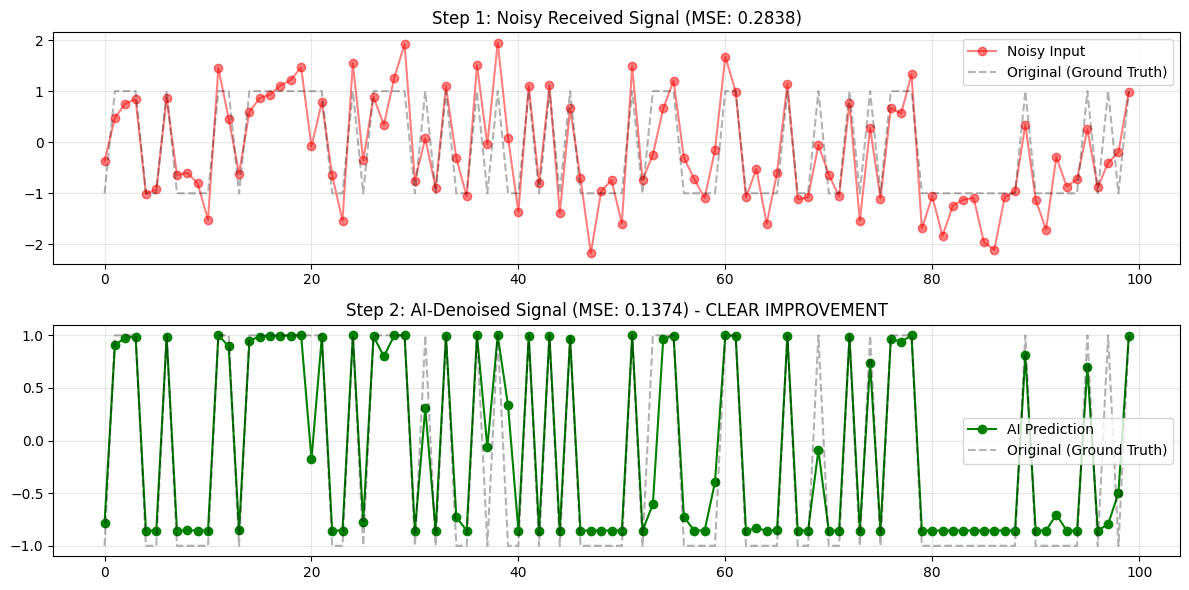


DEMO RESULTS (On 100 bits)
Original Noise MSE : 0.2838
AI Cleaned MSE     : 0.1374
----------------------------------------
Bit Errors (Standard) : 5
Bit Errors (AI Aided) : 5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ==========================================
# 1. DATA GENERATION (BPSK Signal)
# ==========================================
def generate_data(num_samples, noise_level=0.5):
    # Generate random bits (0 or 1)
    bits = np.random.randint(0, 2, num_samples)

    # BPSK Modulation: 0 -> -1, 1 -> +1
    clean_signal = np.where(bits > 0, 1, -1)

    # Add Gaussian Noise (AWGN)
    noise = np.random.normal(0, noise_level, num_samples)
    noisy_signal = clean_signal + noise

    return clean_signal, noisy_signal, bits

# Generate 10,000 samples for training
N_TRAIN = 10000
clean_train, noisy_train, _ = generate_data(N_TRAIN, noise_level=0.6)

# Generate 100 samples for the demo/testing
N_TEST = 100
clean_test, noisy_test, original_bits = generate_data(N_TEST, noise_level=0.6)

# ==========================================
# 2. BUILD TINY NEURAL NETWORK
# ==========================================
# A simple stack of layers to learn the mapping
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)), # Hidden layer 1
    Dense(8, activation='relu'),                    # Hidden layer 2
    Dense(1, activation='tanh')                     # Output (-1 to 1 range)
])

model.compile(optimizer='adam', loss='mse')

# ==========================================
# 3. TRAIN THE MODEL
# ==========================================
print("Training AI Model...")
# We ask the AI: "Given the noisy version, guess the clean version"
history = model.fit(noisy_train, clean_train, epochs=20, batch_size=64, verbose=0)
print("Training Complete.")

# ==========================================
# 4. PREDICT & VISUALIZE
# ==========================================
# Predict the cleaned signal
denoised_signal = model.predict(noisy_test)

# Calculate Improvement (Mean Squared Error)
mse_noisy = np.mean((clean_test - noisy_test)**2)
mse_ai = np.mean((clean_test - denoised_signal.flatten())**2)

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: The Noisy Reality
plt.subplot(2, 1, 1)
plt.title(f"Step 1: Noisy Received Signal (MSE: {mse_noisy:.4f})")
plt.plot(noisy_test, 'o-', color='red', alpha=0.5, label='Noisy Input')
plt.plot(clean_test, 'k--', alpha=0.3, label='Original (Ground Truth)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: The AI Output
plt.subplot(2, 1, 2)
plt.title(f"Step 2: AI-Denoised Signal (MSE: {mse_ai:.4f}) - CLEAR IMPROVEMENT")
plt.plot(denoised_signal, 'o-', color='green', label='AI Prediction')
plt.plot(clean_test, 'k--', alpha=0.3, label='Original (Ground Truth)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 5. NUMERICAL PROOF (Bit Error Rate)
# ==========================================
# Decode bits: If signal > 0, bit is 1. Else 0.
decoded_bits_noisy = np.where(noisy_test > 0, 1, 0)
decoded_bits_ai = np.where(denoised_signal.flatten() > 0, 1, 0)

errors_noisy = np.sum(decoded_bits_noisy != original_bits)
errors_ai = np.sum(decoded_bits_ai != original_bits)

print("\n" + "="*40)
print(f"DEMO RESULTS (On {N_TEST} bits)")
print("="*40)
print(f"Original Noise MSE : {mse_noisy:.4f}")
print(f"AI Cleaned MSE     : {mse_ai:.4f}")
print("-" * 40)
print(f"Bit Errors (Standard) : {errors_noisy}")
print(f"Bit Errors (AI Aided) : {errors_ai}")
print("="*40)